In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
df = pd.read_csv('data/summary.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 14 columns):
status         2592 non-null object
resource2      2592 non-null object
est_avg_lat    2592 non-null int64
est_lut        2592 non-null int64
unroll         2592 non-null int64
resource1      2592 non-null object
est_ff         2592 non-null int64
est_bram       2592 non-null int64
est_dsp        2592 non-null int64
est_min_lat    2592 non-null int64
bench          2592 non-null object
bank1          2592 non-null int64
bank2          2592 non-null int64
est_max_lat    2592 non-null int64
dtypes: int64(10), object(4)
memory usage: 283.6+ KB


In [52]:
# Make sure estimated latencies are consistent
for idx in range(len(df)):
    assert df.est_min_lat[idx] == df.est_max_lat[idx] and df.est_max_lat[idx] == df.est_avg_lat[idx]

In [53]:
# Set of scatter plots to draw
resources = [ 'est_' + key for key in [ 'ff', 'dsp', 'bram', 'lut' ]]
plots = [ ('est_avg_lat', key) for key in resources ]
plots += [ ('est_bram', 'est_lut'), ('est_lut', 'est_ff')]

In [60]:
# Calculate pareto points
# From: https://stackoverflow.com/questions/32791911/fast-calculation-of-pareto-front-in-python
def find_pareto(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    print(costs.shape)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs[:i]>c, axis=1)) and np.all(np.any(costs[i+1:]>c, axis=1))
    return is_efficient

opts = find_pareto(df[resources + ['est_avg_lat']].to_numpy())

df['pareto'] = opts

(2592, 5)


<Figure size 432x288 with 0 Axes>

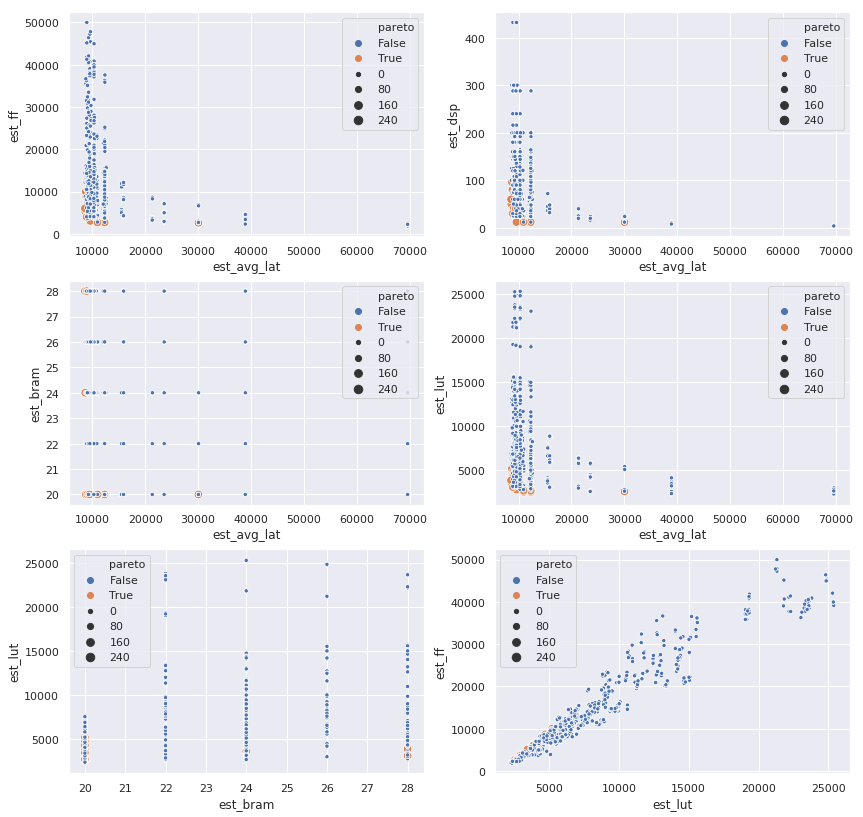

In [73]:
plt.figure()
sns.set()

# Configuration for subplot
cols = 2
rows = int(len(plots) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 14))
pal = sns.color_palette('husl', 8)

print()

for idx, (x_key, y_key) in enumerate(plots):
    ax = axes[int(idx / cols), idx % cols]
    sns.scatterplot(x=x_key, y=y_key, hue='pareto', size=np.where(opts == True, 200, 10), data=df, ax=ax)

In [74]:
fig.savefig('pareto.png', dpi=300)